In [93]:
"""
Created on: Tue. 9 Aug. 2022
Updated on: Tue. 16 Aug. 2022
Updated on: Tue. 23 Aug. 2022
Author: Mélina Verger
"""
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

# To interact with the operating system
import os

# To compute correlation
import pandas as pd

# For data manipulation
import numpy as np

# To compute MI
from sklearn.feature_selection import mutual_info_classif

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
studentInfo_num_scaled = pd.read_csv("./data/studentInfo_num_scaled.csv")

In [26]:
studentInfo_num_scaled

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_AAA,code_module_BBB,...,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,1.0,0.75,0.0,1.0,0.0,0.35,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.75,1.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.50,0.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.25,0.0,0.0,0.0,0.05,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.50,0.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17800,0.0,0.25,1.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17801,0.0,0.25,1.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17802,0.0,0.25,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17803,0.0,0.25,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
# Correlation matrix
studentInfo_num_scaled.corr(method="kendall")

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_AAA,code_module_BBB,...,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
gender,1.000000,0.071609,-0.066670,-0.036182,-0.012947,0.066762,-0.039762,-0.034705,0.024976,-0.488879,...,-0.013505,0.023185,0.031842,0.036818,-0.001056,0.020374,-0.002128,-0.030669,-0.010460,-0.006397
highest_education,0.071609,1.000000,-0.080288,0.043218,-0.026926,0.062504,-0.063227,0.130094,0.077452,-0.062786,...,-0.004724,-0.011355,-0.035091,0.163092,-0.011709,-0.000031,-0.020308,-0.011661,-0.023650,-0.010298
imd_band,-0.066670,-0.080288,1.000000,-0.032907,0.027448,0.015017,0.053866,-0.094405,-0.047614,0.069952,...,0.128269,0.060982,0.103611,-0.036090,-0.071399,-0.157800,-0.018520,0.019902,0.063330,0.057125
age_band,-0.036182,0.043218,-0.032907,1.000000,0.001100,-0.085906,-0.018487,0.060613,0.091524,0.045590,...,0.035648,-0.033449,-0.016482,0.034587,0.012264,0.009050,-0.004662,0.008898,-0.038869,-0.023203
num_of_prev_attempts,-0.012947,-0.026926,0.027448,0.001100,1.000000,0.191630,0.049796,-0.123752,-0.043714,0.046321,...,0.004786,0.004893,-0.012996,0.004989,0.008126,-0.027583,-0.007577,0.023617,0.017252,-0.009487
studied_credits,0.066762,0.062504,0.015017,-0.085906,0.191630,1.000000,0.005724,-0.012275,0.030084,0.111781,...,0.011281,0.001295,-0.008801,-0.005148,-0.004484,-0.010878,0.003857,0.028556,-0.006084,-0.003889
disability,-0.039762,-0.063227,0.053866,-0.018487,0.049796,0.005724,1.000000,-0.035106,-0.022878,0.001984,...,-0.013842,-0.034489,0.012318,0.010981,0.002961,0.024059,0.020759,-0.025286,-0.000216,-0.039925
final_result,-0.034705,0.130094,-0.094405,0.060613,-0.123752,-0.012275,-0.035106,1.000000,0.079682,0.010578,...,-0.024185,-0.009642,-0.037129,-0.010866,0.034362,0.045651,0.023164,-0.046314,-0.002983,-0.006234
code_module_AAA,0.024976,0.077452,-0.047614,0.091524,-0.043714,0.030084,-0.022878,0.079682,1.000000,-0.109027,...,-0.007475,-0.004871,-0.007253,-0.011814,0.001858,0.009347,0.020688,-0.025713,0.000982,0.010213
code_module_BBB,-0.488879,-0.062786,0.069952,0.045590,0.046321,0.111781,0.001984,0.010578,-0.109027,1.000000,...,-0.027540,-0.016850,-0.046593,-0.015826,-0.008990,-0.038906,-0.019476,0.122588,0.003673,0.005443


In [28]:
if not os.path.exists("figures"):
    os.mkdir("figures")

else:
    print("The folder 'figures' already exists.")

The folder 'figures' already exists.


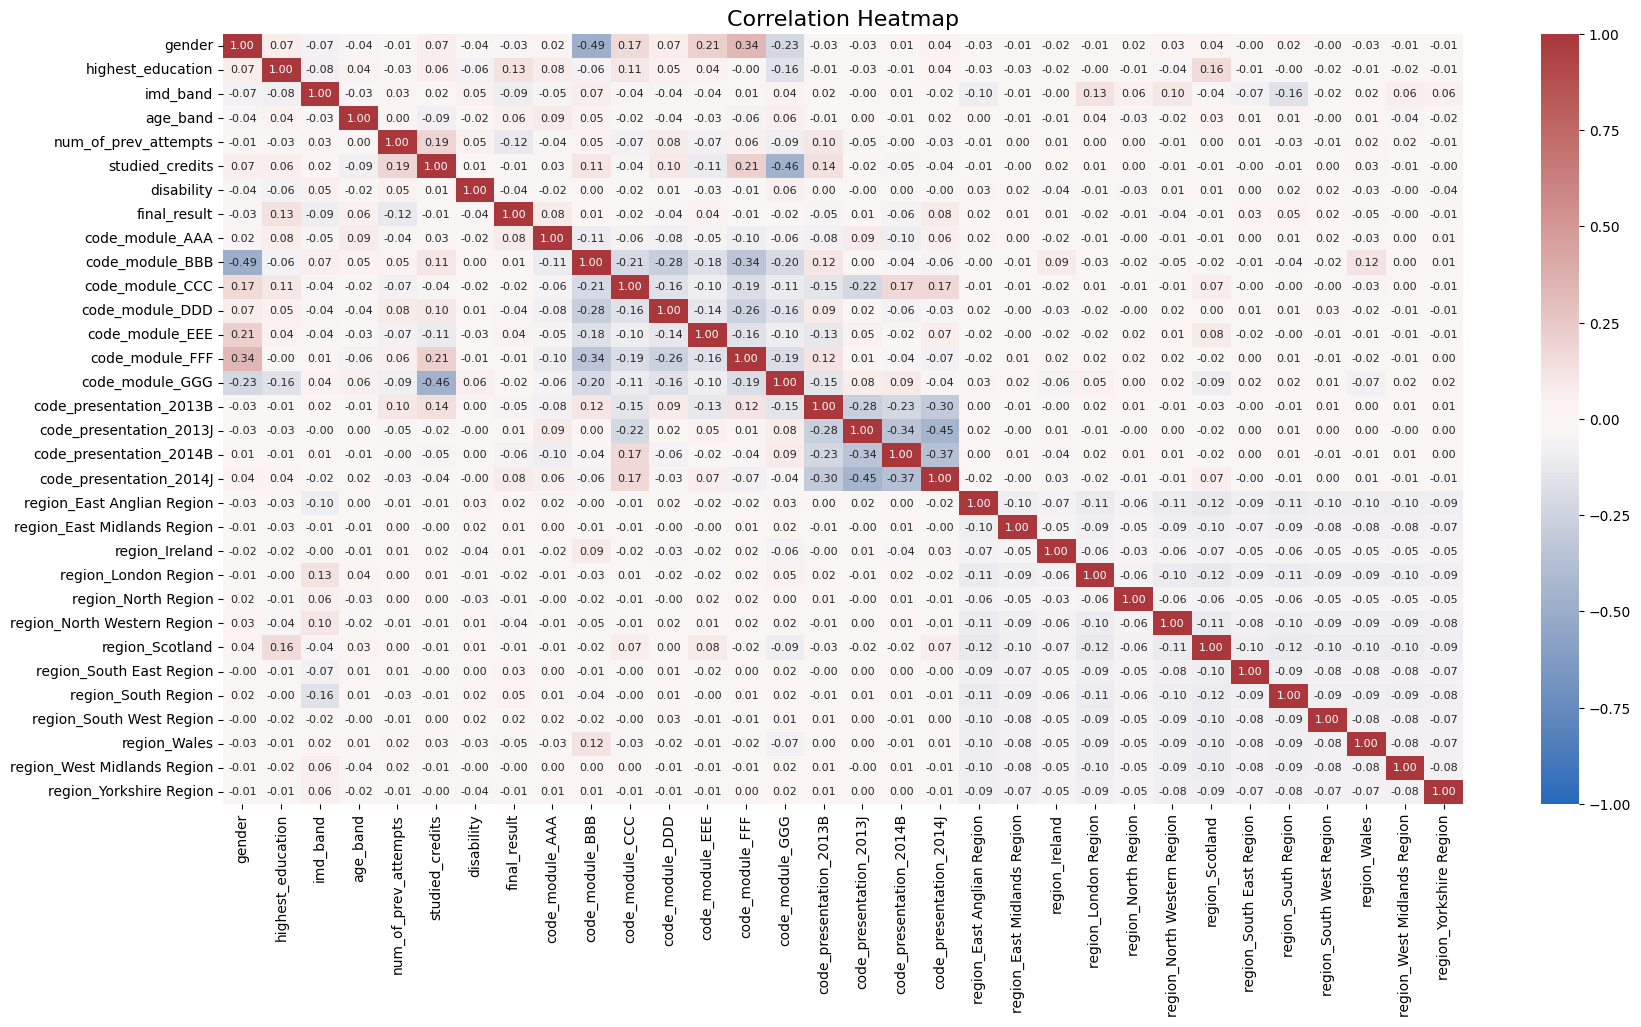

In [29]:
plt.figure(figsize=(20, 10), facecolor="white")

heatmap = sns.heatmap(
    studentInfo_num_scaled.corr(method="kendall"),  
    vmin=-1, vmax=1, # because correlation coefficient
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Correlation Heatmap', fontsize=16)

plt.savefig('./figures/correlation_heatmap_kendall.png')

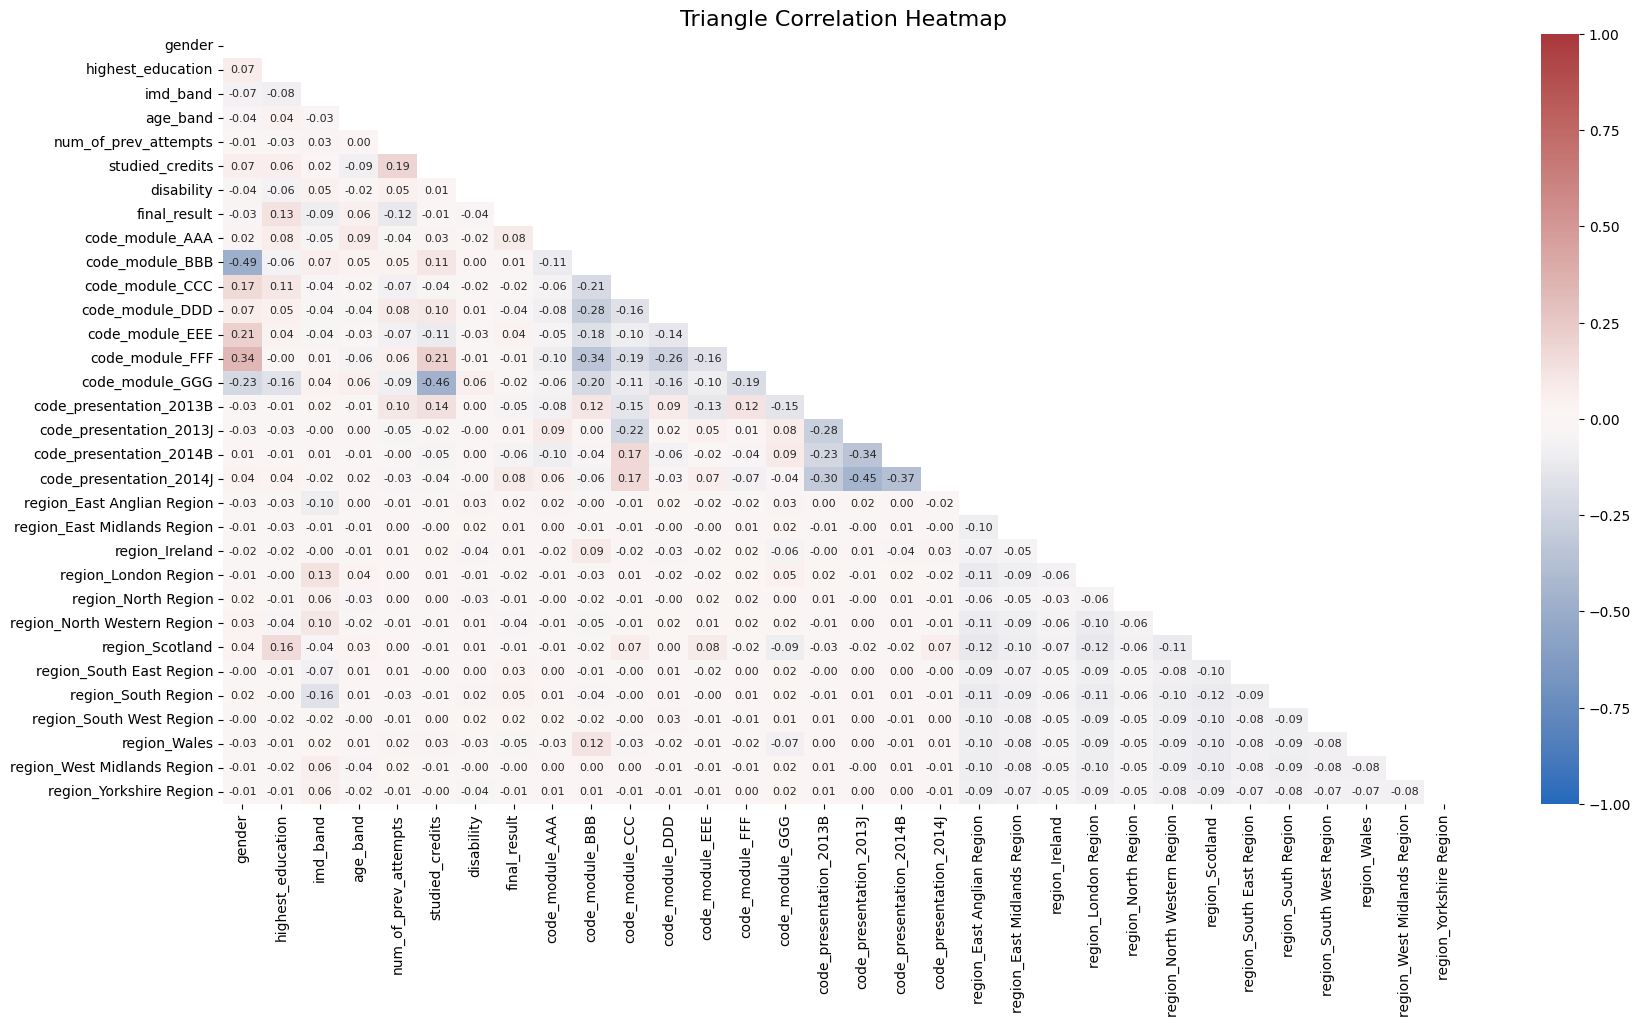

In [30]:
plt.figure(figsize=(20, 10), facecolor="white")

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(studentInfo_num_scaled.corr(method="kendall"), dtype=bool))

heatmap = sns.heatmap(
    studentInfo_num_scaled.corr(method="kendall"),  
    mask=mask,
    vmin=-1, vmax=1, # because correlation coefficient
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Triangle Correlation Heatmap', fontsize=16)

plt.savefig('./figures/triangle_correlation_heatmap_kendall.png')

## Elimination

### code_presentation

In [31]:
col = list()
for column in studentInfo_num_scaled.columns:
    if "code_presentation" in column:
        col.append(column)

studentInfo_num_scaled_without_codepresentation = studentInfo_num_scaled.drop(columns=col)

In [32]:
studentInfo_num_scaled_without_codepresentation

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_AAA,code_module_BBB,...,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,1.0,0.75,0.0,1.0,0.0,0.35,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.75,1.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.50,0.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.25,0.0,0.0,0.0,0.05,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.50,0.0,0.5,0.0,0.05,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17800,0.0,0.25,1.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17801,0.0,0.25,1.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17802,0.0,0.25,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17803,0.0,0.25,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

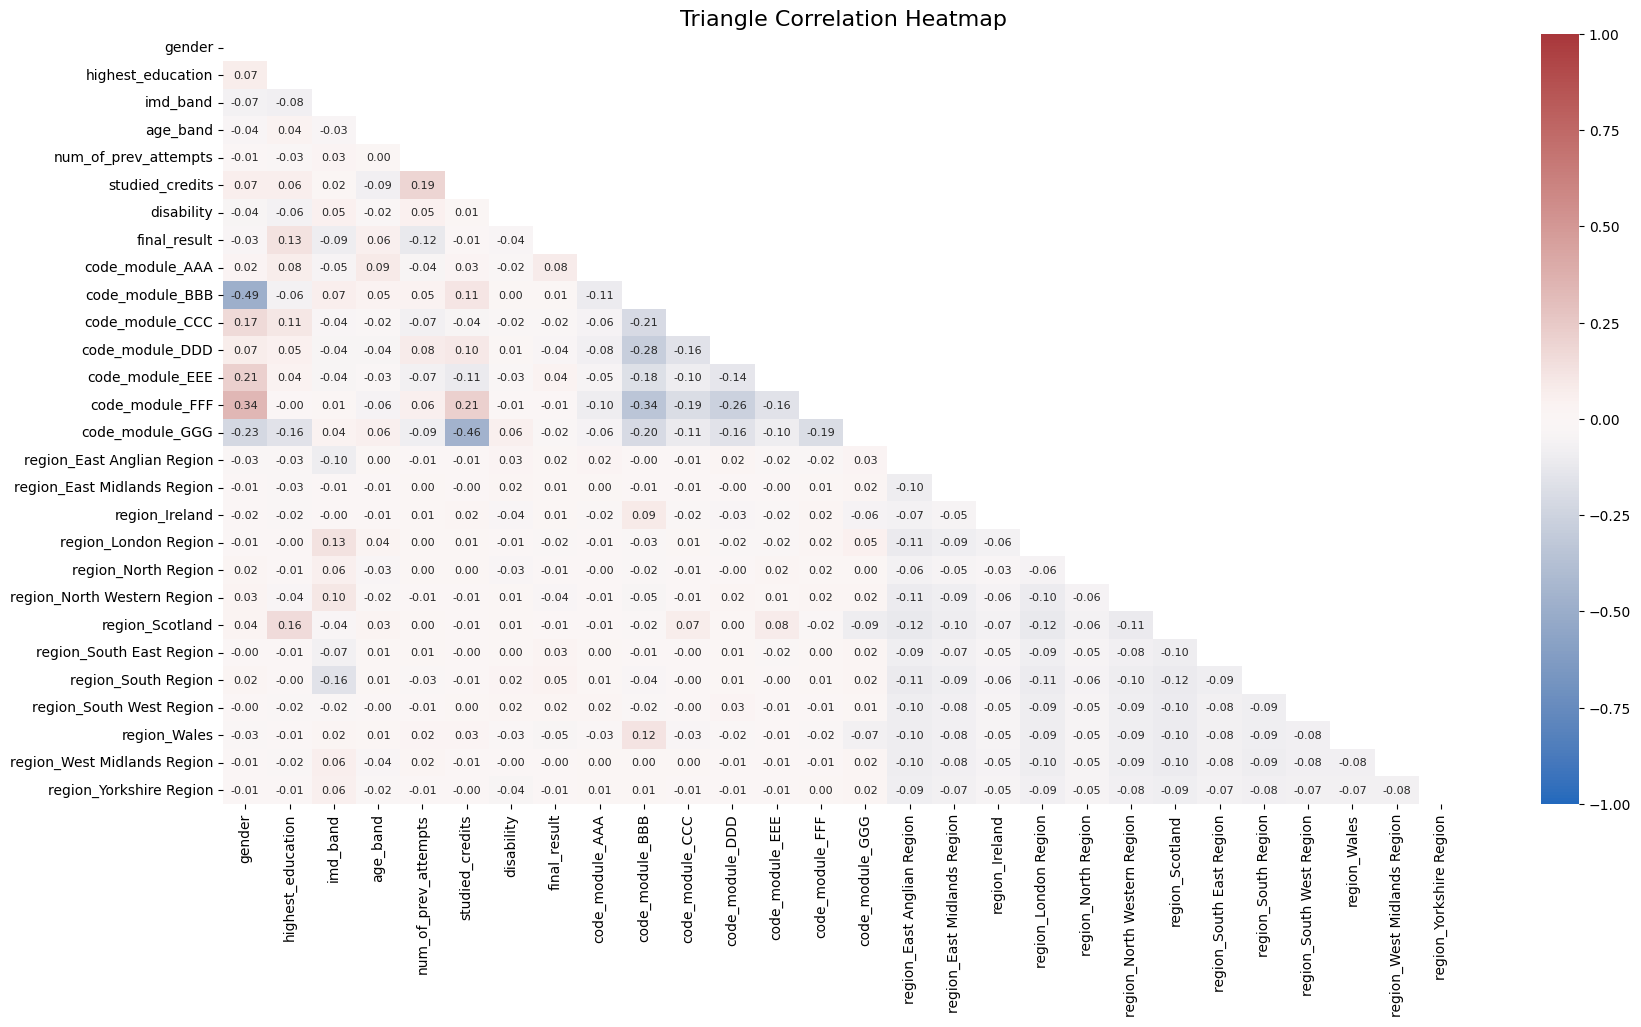

In [33]:
plt.figure(figsize=(20, 10), facecolor="white")

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(studentInfo_num_scaled_without_codepresentation.corr(method="kendall"), dtype=bool))

heatmap = sns.heatmap(
    studentInfo_num_scaled_without_codepresentation.corr(method="kendall"),  
    mask=mask,
    vmin=-1, vmax=1,
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Triangle Correlation Heatmap', fontsize=16)

### region

In [34]:
col = list()
for column in studentInfo_num_scaled_without_codepresentation.columns:
    if "region" in column:
        col.append(column)

studentInfo_num_scaled_without_codepresentation_region = studentInfo_num_scaled_without_codepresentation.drop(columns=col)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

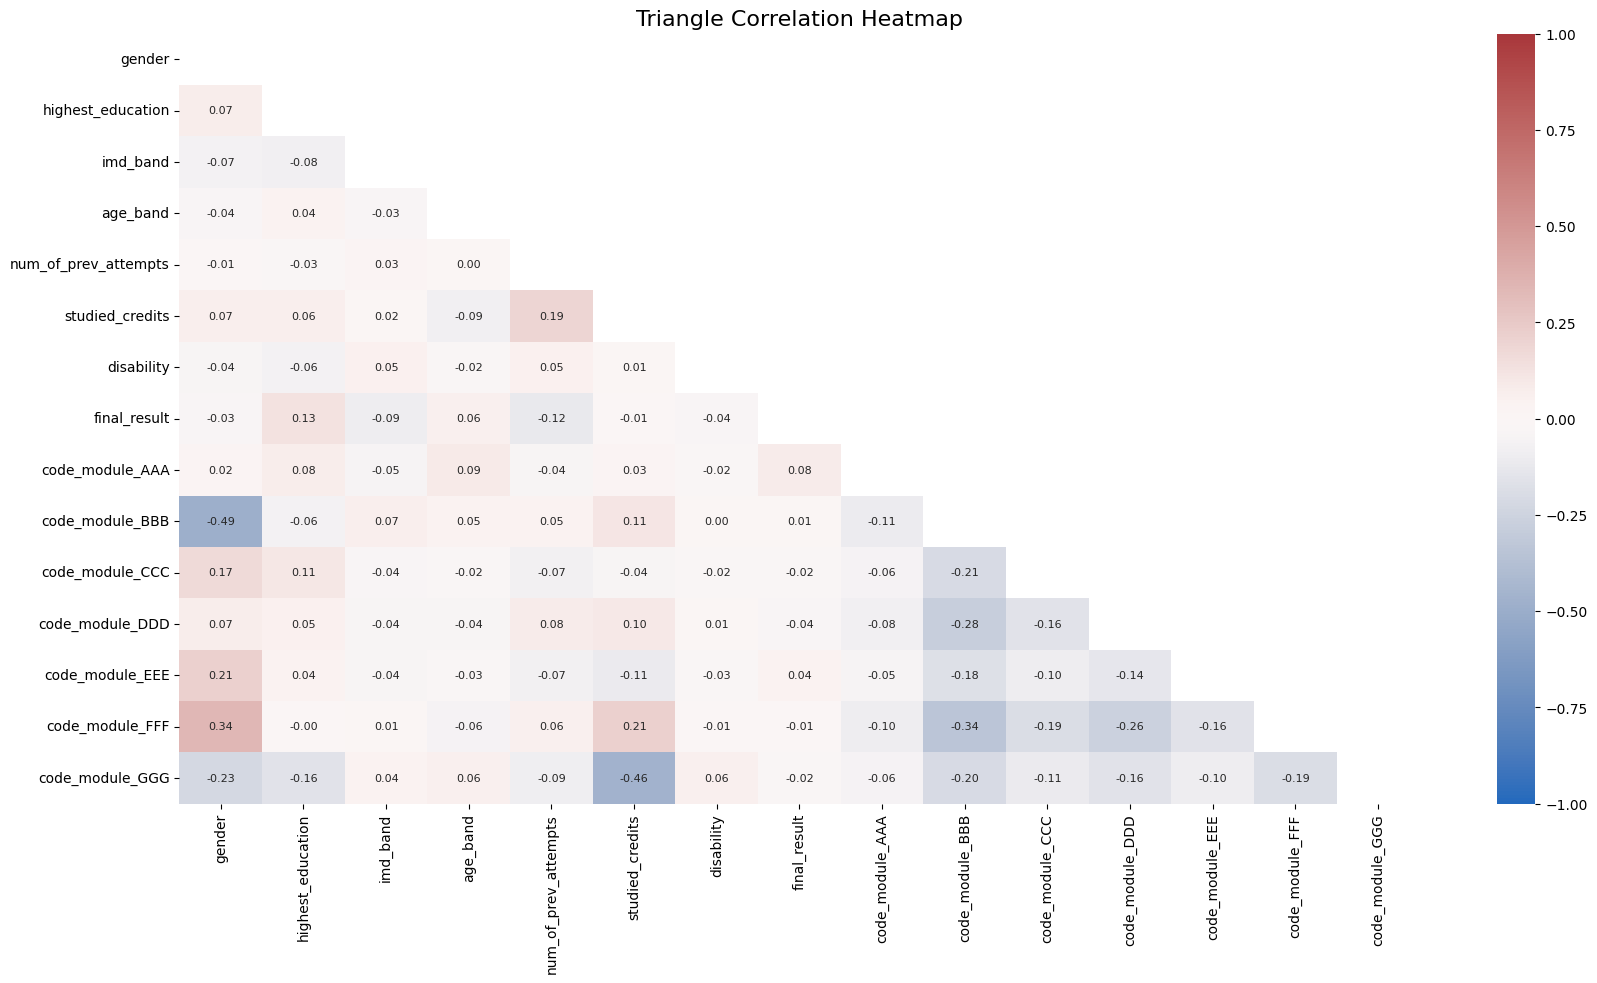

In [35]:
plt.figure(figsize=(20, 10), facecolor="white")

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(studentInfo_num_scaled_without_codepresentation_region.corr(method="kendall"), dtype=bool))

heatmap = sns.heatmap(
    studentInfo_num_scaled_without_codepresentation_region.corr(method="kendall"),  
    mask=mask,
    vmin=-1, vmax=1,
    annot=True, 
    annot_kws={"fontsize":8},
    fmt=".2f",
    cmap="vlag"
    )

heatmap.set_title('Triangle Correlation Heatmap', fontsize=16)

## (Optional) Pairwise relationships and other correlation plots

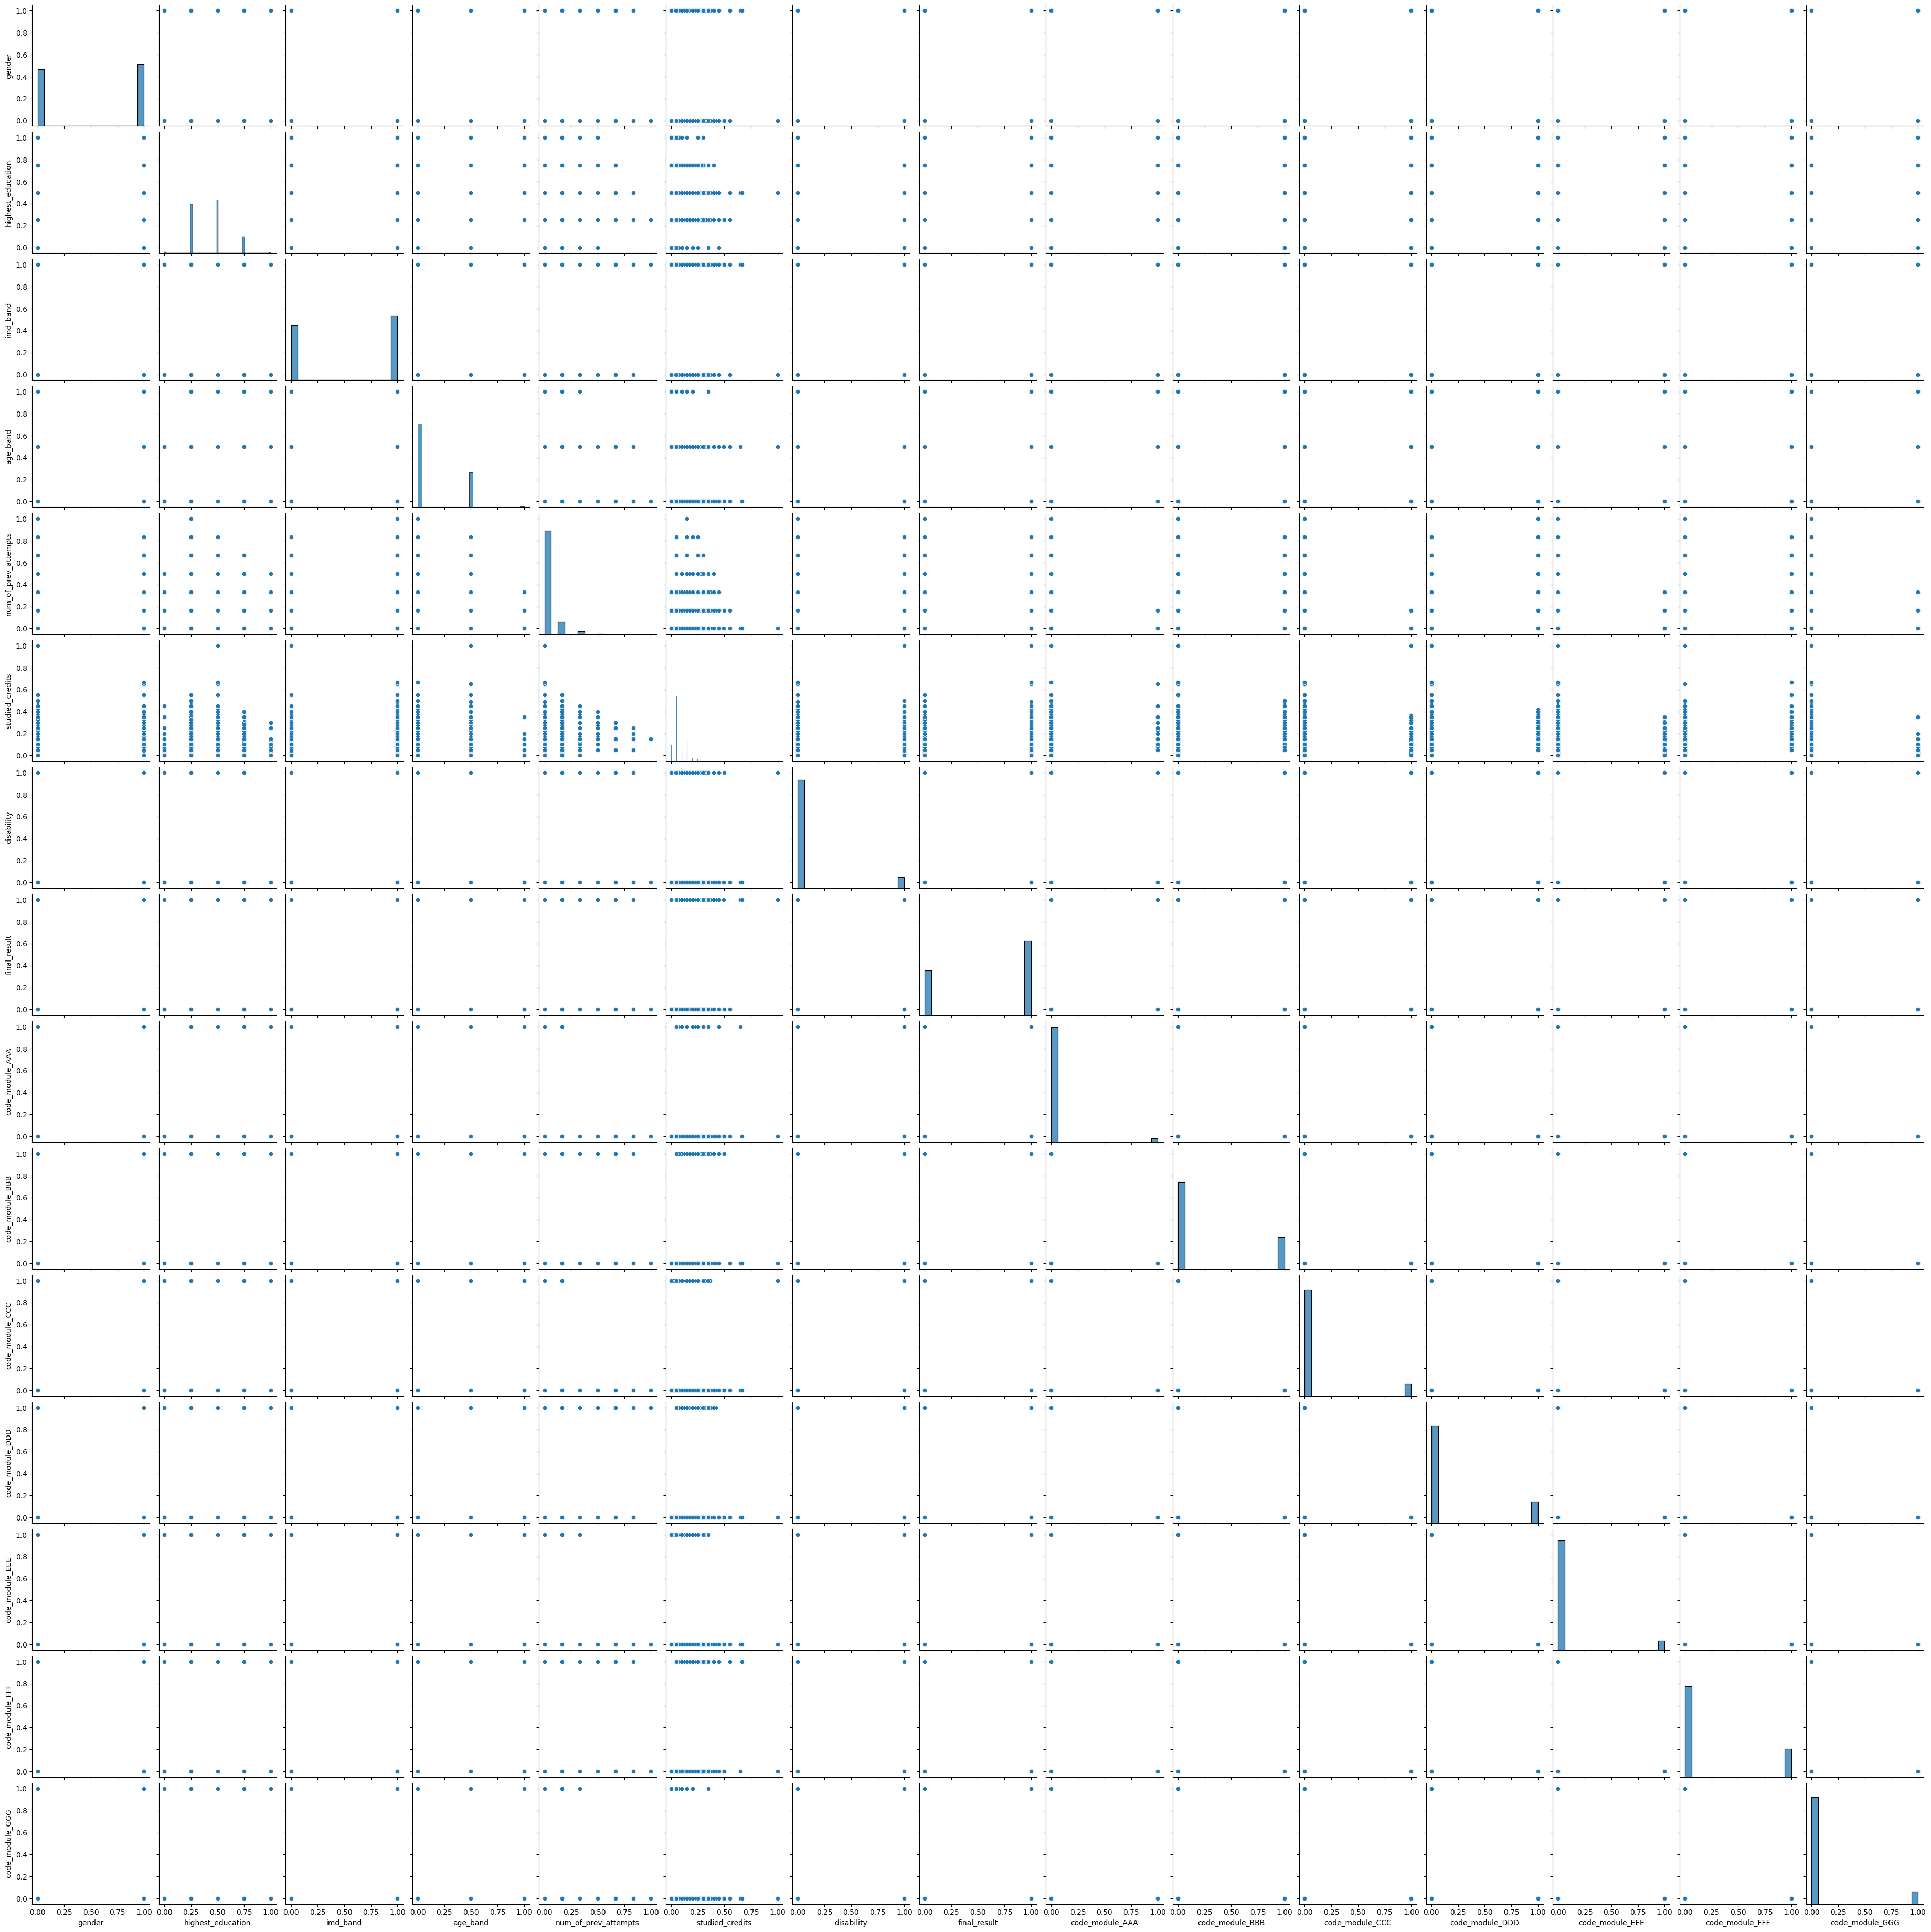

In [36]:
sns.pairplot(studentInfo_num_scaled_without_codepresentation_region)

<Figure size 500x500 with 0 Axes>

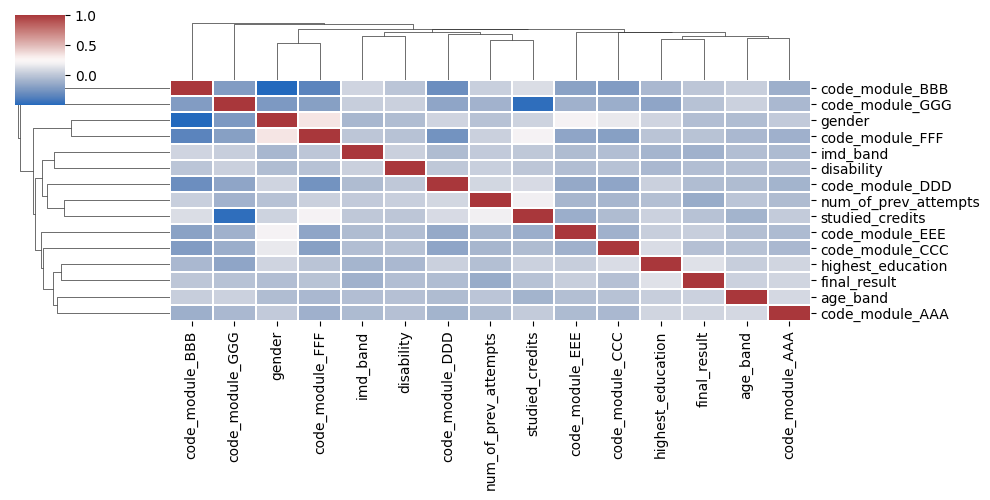

In [143]:
plt.figure(figsize=(5,5))
sns.clustermap(studentInfo_num_scaled_without_codepresentation_region.corr(method="kendall"), 
           cmap="vlag",
           linewidths=0.1,
           figsize=(10,5))

<AxesSubplot:>

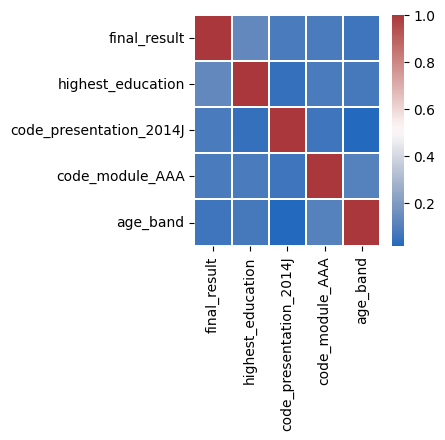

In [147]:
k = 5 #number of variables for heatmap
corrmat = studentInfo_num_scaled.corr(method="kendall")
cols = corrmat.nlargest(k, 'final_result')['final_result'].index
cm = np.corrcoef(studentInfo_num_scaled[cols].values.T)
f, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm, ax=ax, cmap="vlag", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

## Mutual information

In [115]:
def make_mi_scores(X, y, label):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI scores " + label, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# MI by final_result
X_mi_finalresult = studentInfo_num_scaled_without_codepresentation_region.drop(columns=["final_result"])
y_mi_finalresult = studentInfo_num_scaled_without_codepresentation_region["final_result"].astype(int)
mi_scores_finalresult = make_mi_scores(X_mi_finalresult, y_mi_finalresult, "final_result")

# MI by gender
X_mi_gender = studentInfo_num_scaled_without_codepresentation_region.drop(columns=["final_result", "gender"])
y_mi_gender = studentInfo_num_scaled_without_codepresentation_region["gender"].astype(int)
mi_scores_gender = make_mi_scores(X_mi_gender, y_mi_gender, "gender")

# MI by imd_band
X_mi_imdband = studentInfo_num_scaled_without_codepresentation_region.drop(columns=["final_result", "imd_band"])
y_mi_imdband = studentInfo_num_scaled_without_codepresentation_region["imd_band"].astype(int)
mi_scores_imdband = make_mi_scores(X_mi_imdband, y_mi_imdband, "imd_band")

<AxesSubplot:>

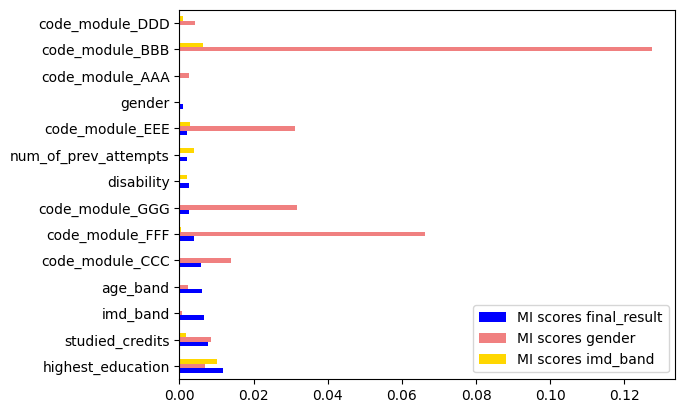

In [137]:
pd.DataFrame([mi_scores_finalresult, mi_scores_gender, mi_scores_imdband]).T.plot.barh(color={"MI scores final_result": "blue", 
                                                                                              "MI scores gender": "lightcoral",
                                                                                              "MI scores imd_band": "gold"})

<AxesSubplot:>

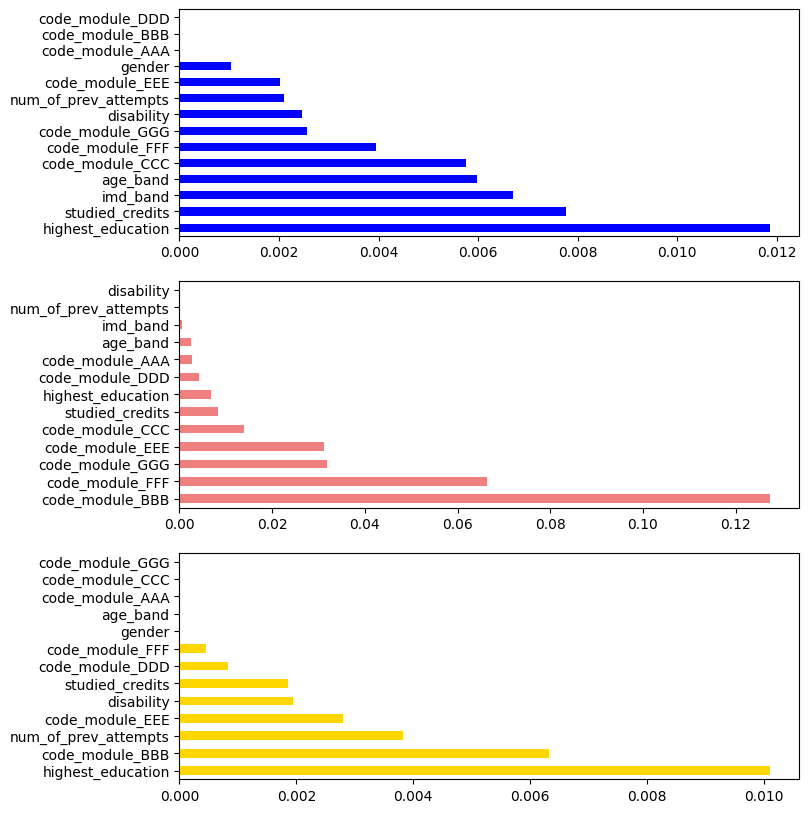

In [136]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))
mi_scores_finalresult.plot(ax=axes[0], kind="barh", color="blue")
mi_scores_gender.plot(ax=axes[1], kind="barh", color="lightcoral")
mi_scores_imdband.plot(ax=axes[2], kind="barh", color="gold")